In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.dummy import DummyClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [9]:
# Load data from github
#df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/lab3/bank-additional-full.csv', sep=';')
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888-2023/main/lab3-modelling/bank-additional-full.csv', sep=';')
dfcopy = df.copy()
dfcopy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
# Use LabelEncoder to convert the label into numbers.

label_encoder = preprocessing.LabelEncoder()
dfcopy["y"] = label_encoder.fit_transform(dfcopy["y"])
print(dfcopy["y"])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [11]:
# one-hot encoding on the categorical features
df_dummies = pd.get_dummies(dfcopy, columns=["job", "marital","marital","education","default","housing","loan","contact","month", "day_of_week","poutcome"])
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Column "duration" must be deleted
cleaned_df = df_dummies.drop(['duration'],axis=1)
cleaned_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [13]:
# Check if there are any missing values in the dataset. If there are, drop the rows.
nona_df = cleaned_df.dropna()
print(nona_df.size)
nona_df.head()
nona_df.shape

# cleaned_df = cleaned_df.dropna()
# print(cleaned_df.size)
# cleaned_df.head()

# nona_df = cleaned_df.dropna()
# cleaned_df.dropna(axis=0,how='any',inplace=True)
# print(cleaned_df.size)
# cleaned_df.head()

2759596


(41188, 67)

In [14]:
y = nona_df['y']
X = nona_df.drop(['y'],axis=1)
print(X.size)
print(y.size)
# Y 2718408



2718408
41188


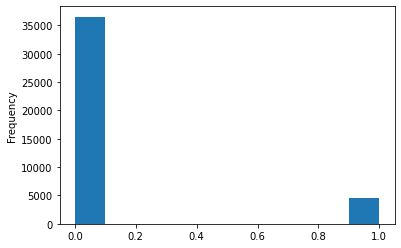

In [15]:
# Plot histogram of the label and calculate the imbalance in the dataset.
y.plot.hist()

In [16]:
# Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)

In [17]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [18]:
# Lets split the data into 10 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
kf

StratifiedKFold(n_splits=10, random_state=50, shuffle=True)

In [21]:
f1_score = cross_val_score(RandomForestClassifier(random_state= 50, n_estimators=100, max_depth=3), X_train, y_train, cv= kf, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.23555556 0.27740492 0.2826087  0.2027027  0.22883295 0.31397849
 0.23660714 0.24601367 0.23476298 0.24719101]
F1 average score: 0.25


In [22]:
# Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
y_Prediction_dummy = dummy_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Score:", dummy_clf.score(y_test, y_Prediction_dummy))

print("F1 Score:", metrics.f1_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.recall_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.r2_score(y_test, y_Prediction_dummy))

Score: 0.8055353241077932
F1 Score: 0.12378902045209902
Recall: 0.12392241379310345
Recall: -0.9770189631586395


In [24]:
# dummy_clf = DummyClassifier(strategy="stratified")
# dummy_clf.fit(X_train, y_train)
# y_Prediction_dummy = dummy_clf.predict(X_test)

# Quiz
f1_score = cross_val_score(DummyClassifier(strategy="stratified"), X_train, y_train, scoring="f1",cv=10)
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

# Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=250, max_depth=6), X_train, y_train, cv= kf, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')
#Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=8), X_train, y_train, cv= kf, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.15220294 0.1260274  0.11405836 0.08608321 0.08469945 0.10483871
 0.08421053 0.10980392 0.15159574 0.13550136]
F1 average score: 0.11
F1 score for each fold are: [0.25917927 0.30634573 0.31712474 0.22319475 0.29130435 0.34237996
 0.27837259 0.2788671  0.27956989 0.26048565]
F1 average score: 0.28
F1 score for each fold are: [0.30165289 0.33333333 0.33057851 0.25321888 0.30703625 0.36437247
 0.29707113 0.30543933 0.30227743 0.28755365]
F1 average score: 0.31


In [25]:

# Quiz
f1_score = cross_val_score(RandomForestClassifier(random_state= 60, n_estimators=100, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.25652174 0.3034188  0.22666667 0.291939   0.23144105 0.30967742
 0.38934426 0.25110132 0.27074236 0.28571429]
F1 average score: 0.28


In [ ]:
# Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=8), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')


F1 score for each fold are: [0.29831933 0.33402062 0.25695931 0.29247312 0.26638478 0.32696391
 0.40322581 0.27600849 0.30443975 0.29278351]
F1 average score: 0.31


In [26]:
# Use GridSearchCV to find a better set of parameters for your random forest.
from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators': [50,100,125,200], 'max_depth':[10,20,100,None], 'random_state': [105], 'min_samples_split':[5, 10,20], 'max_features': ['auto', 'sqrt']}
parameters = {'n_estimators': [100], 'max_depth':[10], 'random_state': [60], 'min_samples_split':[5, 10]}

clfRF = RandomForestClassifier()
clf = GridSearchCV(clfRF, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_split': [5, 10],
                         'n_estimators': [100], 'random_state': [60]})

In [27]:
# Best estimator parameters for Random Forest classifier
print(clf.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=60)


In [28]:
# Printing the cross validation metrics
from sklearn.model_selection import cross_val_score

clf_RF_CV = RandomForestClassifier(max_depth=10, random_state=105, n_estimators=200, min_samples_split=10, max_features='auto')
scores = cross_val_score(clf_RF_CV, X_train, y_train, cv=5)
scores

array([0.90197269, 0.89848255, 0.89878604, 0.90394537, 0.89893778])

In [29]:
from sklearn.feature_selection import RFECV
feature_selector = RFECV(clf_RF_CV,cv=5)
feature_selector = feature_selector.fit(X_train, y_train)
feature_selector.support_
feature_selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 23, 21, 11,  1,  9,  6,
        3,  1, 14, 19, 12,  1,  1, 24, 16,  5,  1, 25,  8, 15,  1,  1, 26,
        1,  1,  4,  1,  2, 27,  1, 18,  1,  1, 22,  1,  1,  1,  1, 10, 20,
       17,  1,  1,  1, 13,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1])

In [30]:
best_grid = clf.best_estimator_

import numpy as np

def evaluateModel(model_Grid, test_feature_Values, test_label_Values):
    predictionValue = model_Grid.predict(test_feature_Values)
    print("predictionValue : ", predictionValue)
    errorValue = abs(predictionValue - test_label_Values)
    mape = 100 * np.mean(errorValue / test_label_Values)
    print(mape)
    accuracy = 100 - mape
    print('**Model Performance**')
    print('The Average Error found: {:0.4f} degrees.'.format(np.mean(errorValue)))
    print('The Accuracy is = {:0.2f}%.'.format(accuracy))
    
    return accuracy

grid_accuracy = evaluateModel(best_grid,X_test, y_test)

dummy_accuracy = evaluateModel(dummy_clf, X_test, y_test)
print("dummy_accuracy ", dummy_accuracy)

print('There is an increase of {:0.2f}%.'.format( 100 * (grid_accuracy - dummy_accuracy) / dummy_accuracy))

predictionValue :  [0 0 0 ... 0 0 0]
inf
**Model Performance**
The Average Error found: 0.0988 degrees.
The Accuracy is = -inf%.
predictionValue :  [0 0 0 ... 0 0 0]
inf
**Model Performance**
The Average Error found: 0.2056 degrees.
The Accuracy is = -inf%.
dummy_accuracy  -inf
There is an increase of nan%.


<ipython-input-30-bbd3b3094289>:23: RuntimeWarning: invalid value encountered in double_scalars
  print('There is an increase of {:0.2f}%.'.format( 100 * (grid_accuracy - dummy_accuracy) / dummy_accuracy))


Quiz


In [32]:
#Q.1 
#Accuracy is a valid metric to evaluate the performance of a classifier in an unbalanced dataset.
# Yes

In [33]:
#Q.2 
#Accuracy is a valid metric to evaluate the performance of a regressor.
# Yes

In [34]:
#Q.3 
#Scikit-learn's function train_test_split() accepts the parameter test_size. 
#If train size = 86% of the full dataset, what value should test_size have when we call this function?
#1-0.86=0.14

In [ ]:
#Q.4
#How many features does the bank dataset have when you load it?
#

In [35]:
#Q.5
#How many categorical features does the Bank dataset have?
#

In [37]:
#Q.6
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
#using random_state=50 when calling the function.
#Perform 10-fold cross-validation using as a classifier a random forest with 250 estimators and a maximum depth of 6. 
#Report the average F1 score with two numbers after the floating point (e.g., 0.56)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
f1_score = cross_val_score(RandomForestClassifier(random_state= 50, n_estimators=250, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')


F1 score for each fold are: [0.25541126 0.30172414 0.23059867 0.28446389 0.23348018 0.31330472
 0.39837398 0.25438596 0.27133479 0.28144989]
F1 average score: 0.28


In [38]:
#Q.7
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
#using random_state=50 when calling the function.
#Perform 10-fold cross-validation using as a classifier a random forest with 100 estimators and a maximum depth of 8. 
#Report the average F1 score with two numbers after the floating point (e.g., 0.56)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
f1_score = cross_val_score(RandomForestClassifier(random_state= 50, n_estimators=100, max_depth=8), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.28389831 0.33744856 0.26980728 0.28571429 0.26808511 0.32340426
 0.41897233 0.28450106 0.2887931  0.29350105]
F1 average score: 0.31


In [39]:
#Q.8
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
#using random_state=50 when calling the function.

#Report the F1 score on the test set (i.e., generalisation error) of a random forest classifier with 100 estimators and a maximum depth of 6.
#Report the F1 score with two numbers after the floating point (e.g., 0.56).
#Make sure you set the random_state parameter of RandomForestClassifier to 60.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
f1_score = cross_val_score(RandomForestClassifier(random_state= 60, n_estimators=100, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')


F1 score for each fold are: [0.25652174 0.3034188  0.22666667 0.291939   0.23144105 0.30967742
 0.38934426 0.25110132 0.27074236 0.28571429]
F1 average score: 0.28


In [42]:
#Q.9
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

#Train a random forest classifier with 100 estimators and a maximum depth of 10, setting the random_state parameter to 60.

#What are the top 3 features?
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=21)
pca.fit(X_test)
PCA(n_components=21)
print(pca.explained_variance_ratio_)


[8.95515287e-01 1.01161529e-01 2.52404520e-03 4.66124504e-04
 1.76461702e-04 2.22840289e-05 1.64337353e-05 1.12283673e-05
 9.49531939e-06 7.94041965e-06 6.81894026e-06 6.23046955e-06
 6.12999102e-06 5.96745804e-06 5.82444077e-06 5.13839144e-06
 4.98768675e-06 4.75675989e-06 4.57066164e-06 4.42567708e-06
 4.35592557e-06]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 100,max_depth= 10,random_state=60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

# What are the top 3 features?
features = list(X.columns)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree  in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


32950 8238 32950 8238
scores: .0.332949 +/- .0.039002
[ 8  7  2  4  6 65  5  0  3  1 64 63 54 53 56 47 46 48 59 35 40 60 10 52
 38 58 62 42 32 61 14 18 37  9 43 34 45 27 26 31 23 22 29 17 36 13 21 57
 55 25 16 15 51 49 30 50 19 20 41 12 44 11 28 24 33 39]
Feature ranking:
1. nr.employed (0.149045)
2. euribor3m (0.126757)
3. pdays (0.094381)
4. emp.var.rate (0.076546)
5. cons.conf.idx (0.071265)
6. poutcome_success (0.069912)
7. cons.price.idx (0.051538)
8. age (0.042041)
9. previous (0.029050)
10. campaign (0.017975)
11. poutcome_nonexistent (0.016645)
12. poutcome_failure (0.014527)
13. month_may (0.013954)
14. month_mar (0.013900)
15. month_oct (0.013255)
16. contact_telephone (0.012775)
17. contact_cellular (0.012643)
18. month_apr (0.007875)
19. day_of_week_mon (0.007499)
20. education_university.degree (0.005923)
21. housing_no (0.005750)
22. day_of_week_thu (0.005661)
23. job_blue-collar (0.005469)
24. month_jun (0.005361)
25. default_unknown (0.005355)
26. day_of_week_fri (0.005

In [56]:
#Q.10
from sklearn.metrics import classification_report


In [57]:
the_best_model = RandomForestClassifier(n_estimators = 100,
                                        max_depth= 10)
the_best_model.fit(X_train, y_train)
scores = cross_val_score(the_best_model, X_train, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(classification_report(y_test, the_best_model.predict(X_test)))

scores: .0.900243 +/- .0.004381
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.66      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [59]:
import pickle as pkl

outp = open('/model.pkl', 'wb')
pkl.dump(the_best_model, outp, -1)  # where clf is your classifier
outp.close()

In [70]:
test_set = cleaned_df.copy()
test_set.to_csv('/testset.csv')


In [67]:
label_encoder

LabelEncoder()